In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [6]:
print(os.listdir('/root/work/ids/Intrusion-Detection-System'))

['test_accuracy_figure.png', 'dataset', 'main.ipynb', '.git', 'test_time_figure.png', 'training_accuracy_figure.png', '.ipynb_checkpoints', 'README.md', 'train_time_figure.png']


In [7]:
with open("/root/work/ids/Intrusion-Detection-System/dataset/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [8]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [9]:
with open("/root/work/ids/Intrusion-Detection-System/dataset/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [10]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [11]:
path = "/root/work/ids/Intrusion-Detection-System/dataset/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [12]:
df.shape

(494021, 43)

In [13]:
df['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [14]:
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [15]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [16]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [18]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

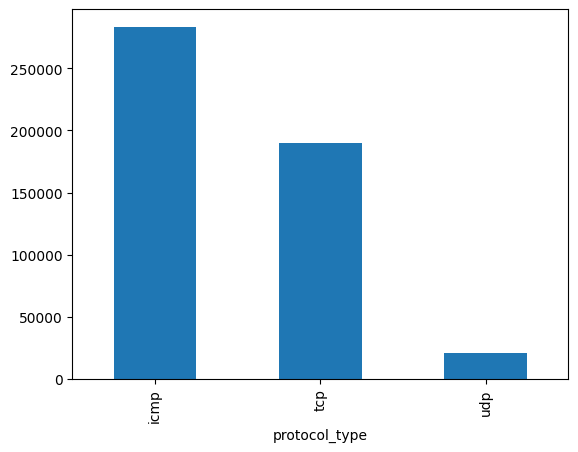

In [19]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

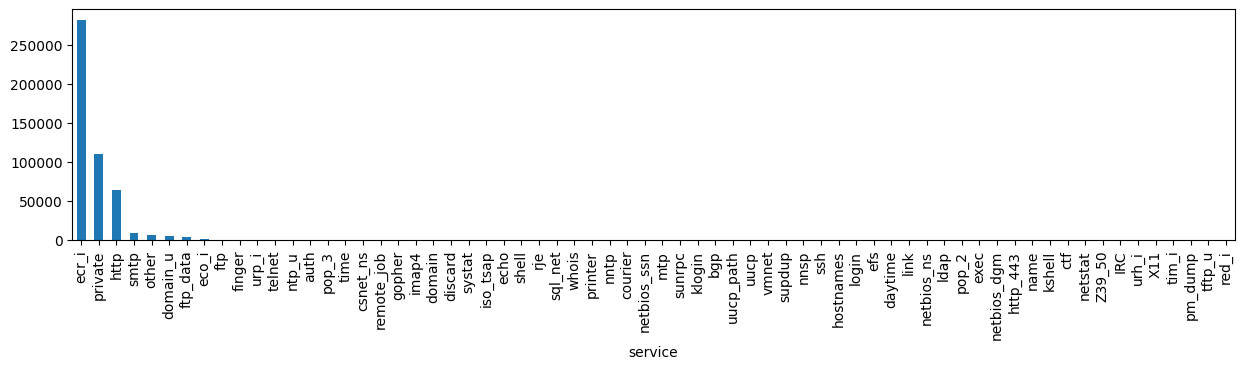

In [20]:
plt.figure(figsize=(15,3))
bar_graph('service')

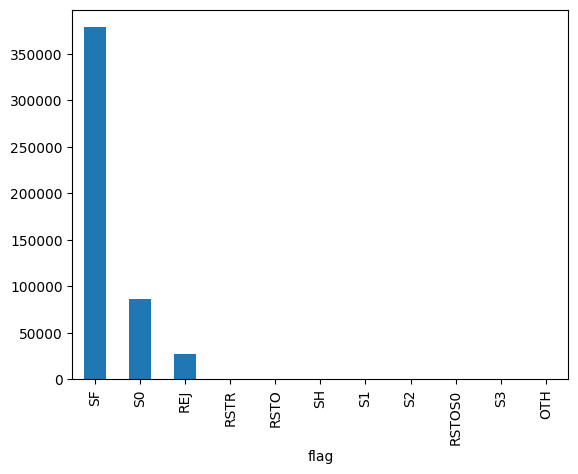

In [21]:
bar_graph('flag')

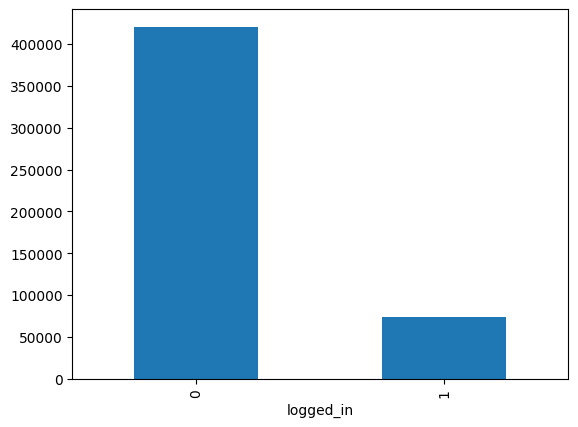

In [22]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

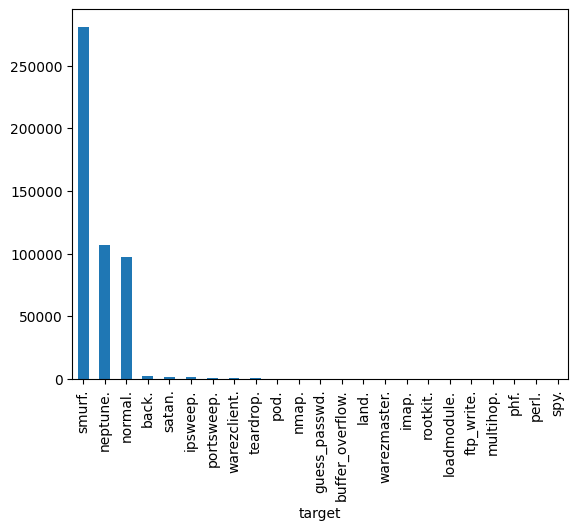

In [23]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

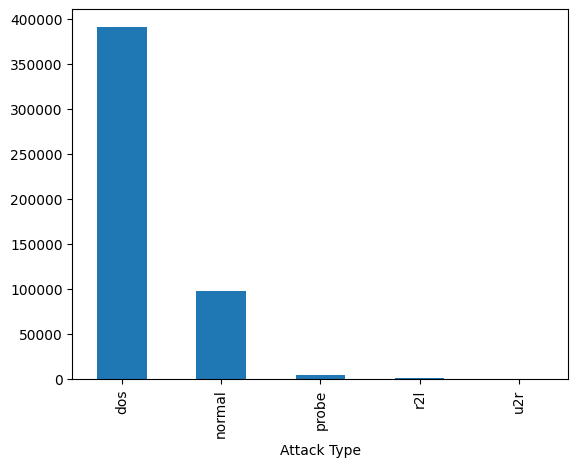

In [24]:
bar_graph('Attack Type')

In [25]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

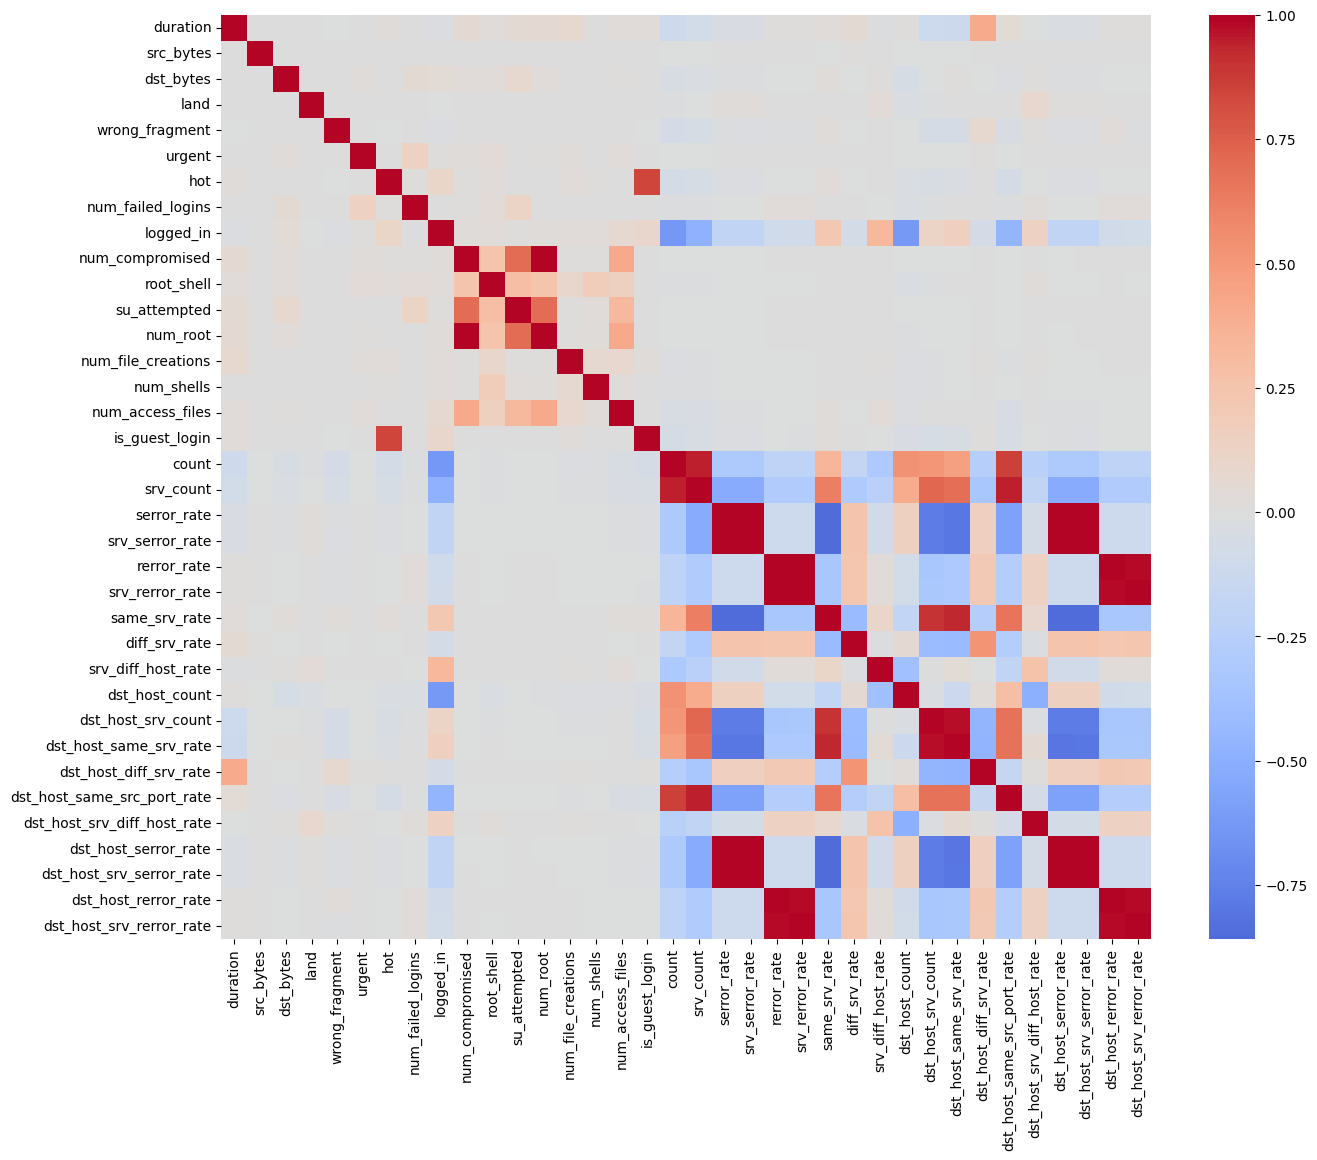

In [26]:

df = df.dropna(axis='columns')  # 또는 axis=1


df = df[[col for col in df if df[col].nunique() > 1]]


corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.show()

In [27]:
df['num_root'].corr(df['num_compromised'])

np.float64(0.9938277978737916)

In [28]:
df['srv_serror_rate'].corr(df['serror_rate'])

np.float64(0.998361507272553)

In [29]:
df['srv_count'].corr(df['count'])

np.float64(0.9436670688882645)

In [30]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.9947309539818242)

In [31]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

np.float64(0.9736854572953835)

In [32]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

np.float64(0.9981559173373293)

In [33]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

np.float64(0.9848038371110285)

In [34]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

np.float64(0.9278080342690969)

In [35]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

np.float64(0.8989546630323716)

In [36]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

np.float64(0.944926367678324)

In [37]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

np.float64(0.9986729680104371)

In [38]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

np.float64(0.9978353003739603)

In [39]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

np.float64(0.997849248567986)

In [40]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

np.float64(0.999304109185027)

In [41]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.986994792495618)

In [42]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

np.float64(0.9821663427308264)

In [43]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.9851995540751695)

In [44]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

np.float64(0.9865705438845764)

In [45]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [46]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [47]:
df.shape

(494021, 33)

In [48]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [49]:
df_std = df.std(numeric_only=True)
df_std = df_std.sort_values(ascending=True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

FEATURE MAPPING

In [50]:
df['protocol_type'].value_counts()

protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

In [51]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [52]:
df['flag'].value_counts()

flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64

In [53]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [54]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [55]:
df.drop('service',axis = 1,inplace= True)

In [56]:
df.shape

(494021, 32)

In [57]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [58]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

MODELLING

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [60]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [61]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [62]:
model1 = GaussianNB()

In [63]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [64]:
print("Training time: ",end_time-start_time)

Training time:  0.30702948570251465


In [65]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [66]:
print("Testing time: ",end_time-start_time)

Testing time:  0.1420917510986328


In [67]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


DECISION TREE

In [68]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [69]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [70]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [71]:
print("Training time: ",end_time-start_time)

Training time:  0.7041890621185303


In [72]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [73]:
print("Testing time: ",end_time-start_time)

Testing time:  0.011912345886230469


In [74]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9939424883834752
Test score is: 0.9938476448686414


RANDOM FOREST

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
model3 = RandomForestClassifier(n_estimators=30)

In [77]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [78]:
print("Training time: ",end_time-start_time)

Training time:  5.741686820983887


In [79]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [80]:
print("Testing time: ",end_time-start_time)

Testing time:  0.15308785438537598


In [81]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999939575943975
Test score is: 0.9997362400093236


SUPPORT VECTOR MACHINE

In [82]:
from sklearn.svm import SVC

In [83]:
model4 = SVC(gamma = 'scale')

In [84]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [85]:
print("Training time: ",end_time-start_time)

Training time:  84.85487723350525


In [86]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [87]:
print("Testing time: ",end_time-start_time)

Testing time:  32.234488010406494


In [88]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


LOGISTIC REGRESSION

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
model5 = LogisticRegression(max_iter=1200000)

In [91]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [92]:
print("Training time: ",end_time-start_time)

Training time:  6.467432975769043


In [93]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [94]:
print("Testing time: ",end_time-start_time)

Testing time:  0.016536951065063477


In [95]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9935044139772926
Test score is: 0.9934796076723488


GRADIENT BOOSTING CLASSIFIER

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
model6 = GradientBoostingClassifier(random_state=0)

In [98]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [99]:
print("Training time: ",end_time-start_time)

Training time:  217.58377981185913


In [100]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [101]:
print("Testing time: ",end_time-start_time)

Testing time:  0.8922982215881348


In [102]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9991389572016411
Test score is: 0.9990553711961823


Artificial Neural Network

In [103]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


2025-06-09 06:24:08.626860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749450248.639409   43732 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749450248.643074   43732 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749450248.653309   43732 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749450248.653327   43732 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749450248.653331   43732 computation_placer.cc:177] computation placer alr

In [104]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [105]:
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train.values.ravel())
Y_train_categorical = to_categorical(Y_train_encoded, num_classes=5)

In [106]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64, verbose=1)

In [107]:
start = time.time()
model7.fit(X_train, Y_train_categorical)
end = time.time()

/root/work/myenv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/root/work/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-09 06:24:10.244776: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8964 - loss: 0.7310
Epoch 2/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9845 - loss: 0.0901
Epoch 3/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9847 - loss: 0.0704
Epoch 4/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9848 - loss: 0.0667
Epoch 5/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9849 - loss: 0.0652
Epoch 6/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9846 - loss: 0.0651
Epoch 7/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9846 - loss: 0.0643
Epoch 8/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9848 - loss: 0.0631
Epoch 9/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9844 - loss: 0.0634
Epoch 10/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9850 - loss: 0.0613
Epoch 11/100
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9844 - loss: 0.0626
Epoch 12/100
5172/5

330994/330994 [==============================] - 7s 22us/step - loss: 0.0571 - accuracy: 0.9848
Epoch 77/100
330994/330994 [==============================] - 6s 20us/step - loss: 0.0570 - accuracy: 0.9848
Epoch 78/100
330994/330994 [==============================] - 7s 22us/step - loss: 0.0570 - accuracy: 0.9848
Epoch 79/100
330994/330994 [==============================] - 7s 22us/step - loss: 0.0569 - accuracy: 0.9848
Epoch 80/100
330994/330994 [==============================] - 6s 19us/step - loss: 0.0568 - accuracy: 0.9848
Epoch 81/100
330994/330994 [==============================] - 8s 24us/step - loss: 0.0568 - accuracy: 0.9848
Epoch 82/100
330994/330994 [==============================] - 7s 21us/step - loss: 0.0567 - accuracy: 0.9848
Epoch 83/100
330994/330994 [==============================] - 8s 23us/step - loss: 0.0567 - accuracy: 0.9848
Epoch 84/100
330994/330994 [==============================] - 7s 20us/step - loss: 0.0566 - accuracy: 0.9848
Epoch 85/100
330994/330994 [====

In [108]:
print('Training time')
print((end-start))

Training time
680.587155342102


In [109]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()

2548/2548 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step


In [110]:
print("Testing time: ",end_time-start_time)

Testing time:  2.0181965827941895


In [112]:
start_time = time.time()
Y_train_pred7 = model7.predict(X_train)
end_time = time.time()

5172/5172 ━━━━━━━━━━━━━━━━━━━━ 3s 514us/step


In [113]:
Y_train_classes = np.argmax(Y_train_categorical, axis=1)
print(f"Y_train_classes sample: {Y_train_classes[:5]}")
print(f"Y_train_classes shape: {Y_train_classes.shape}")

Y_train_pred7_classes = np.argmax(Y_train_pred7, axis=1)
print(f"Y_train_pred7_classes sample: {Y_train_pred7_classes[:5]}")
print(f"Y_train_pred7_classes shape: {Y_train_pred7_classes.shape}")

Y_train_classes sample: [1 0 0 1 0]
Y_train_classes shape: (330994,)
Y_train_pred7_classes sample: [1 0 0 1 0]
Y_train_pred7_classes shape: (330994,)


In [114]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train_classes, Y_train_pred7_classes)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.9978


TRAINING ACCURACY

<BarContainer object of 7 artists>

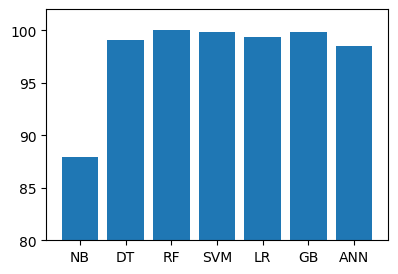

In [115]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.951,99.058,99.997,99.875,99.352,99.793,98.485]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [116]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 7 artists>

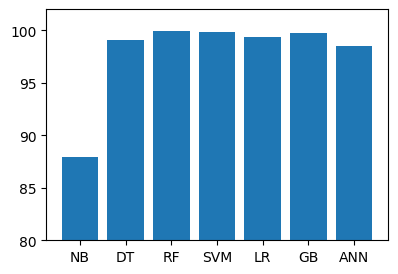

In [117]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.903,99.052,99.969,99.879,99.352,99.771,98.472]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [118]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

<BarContainer object of 7 artists>

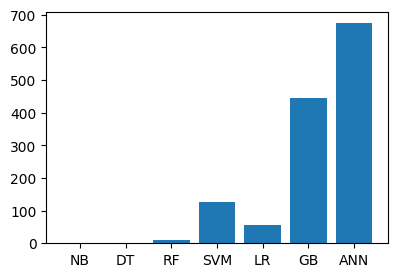

In [119]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [1.04721,1.50483,11.45332,126.96016,56.67286,446.69099,674.12762]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [120]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

<BarContainer object of 7 artists>

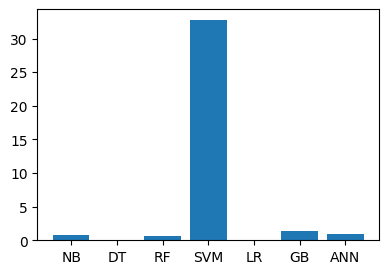

In [121]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [0.79089,0.10471,0.60961,32.72654,0.02198,1.41416,0.96421]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [122]:
f.savefig('test_time_figure.png',bbox_inches='tight')

Extract model

In [125]:
import pickle
import joblib
import os
from datetime import datetime
import tensorflow as tf

In [129]:

print("=== DETAILED MODEL7 DIAGNOSIS ===")

if 'model7' in globals():
    print(f"   Type: {type(model7)}")
    print(f"   Class: {model7.__class__.__name__}")
    print(f"model7.model = {model7.model}")        # None일 것임
    print(f"model7.model_ = {model7.model_}")      # 실제 Keras 모델이 있을 것임

=== DETAILED MODEL7 DIAGNOSIS ===
   Type: <class 'scikeras.wrappers.KerasClassifier'>
   Class: KerasClassifier
model7.model = None
model7.model_ = <Sequential name=sequential, built=True>


In [130]:
print("=== CONVERTING EXISTING MODEL TO TFLITE ===")
if 'model7' in globals():
    keras_model = model7.model_
    

    converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
    basic_tflite = converter.convert()
    
    with open('ann_model_basic.tflite', 'wb') as f:
        f.write(basic_tflite)
    basic_size = len(basic_tflite)
    

    converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    quantized_tflite = converter.convert()
    
    with open('ann_model_quantized.tflite', 'wb') as f:
        f.write(quantized_tflite)
    quantized_size = len(quantized_tflite)
    

    if 'X_train' in globals():
        def representative_dataset():

            for i in range(min(100, len(X_train))):
                yield [X_train[i:i+1].astype('float32')]
        
        converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        converter.representative_dataset = representative_dataset
        converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
        converter.inference_input_type = tf.int8
        converter.inference_output_type = tf.int8
        
        try:
            int8_tflite = converter.convert()
            with open('ann_model_int8.tflite', 'wb') as f:
                f.write(int8_tflite)
            int8_size = len(int8_tflite)
            
            print("=== CONVERSION RESULTS ===")
            print(f"✓ Basic TFLite: {basic_size / 1024:.2f} KB")
            print(f"✓ Quantized TFLite: {quantized_size / 1024:.2f} KB ({quantized_size/basic_size*100:.1f}% of original)")
            print(f"✓ INT8 TFLite: {int8_size / 1024:.2f} KB ({int8_size/basic_size*100:.1f}% of original)")
            
        except Exception as e:
            print(f"INT8 conversion failed: {e}")
            print("Using quantized version instead")
            
            print("=== CONVERSION RESULTS ===")
            print(f"✓ Basic TFLite: {basic_size / 1024:.2f} KB")
            print(f"✓ Quantized TFLite: {quantized_size / 1024:.2f} KB ({quantized_size/basic_size*100:.1f}% of original)")
    
    else:
        print("X_train not found, skipping INT8 quantization")
        print("=== CONVERSION RESULTS ===")
        print(f"✓ Basic TFLite: {basic_size / 1024:.2f} KB")
        print(f"✓ Quantized TFLite: {quantized_size / 1024:.2f} KB ({quantized_size/basic_size*100:.1f}% of original)")

else:
    print("✗ model7 not found in current session")
    

=== CONVERTING EXISTING MODEL TO TFLITE ===
INFO:tensorflow:Assets written to: /tmp/tmppkays6wb/assets


INFO:tensorflow:Assets written to: /tmp/tmppkays6wb/assets


Saved artifact at '/tmp/tmppkays6wb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  138788803458064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803460944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803458832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803459984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803459600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803459792: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1749451665.303212   43732 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1749451665.303233   43732 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-06-09 06:47:45.303497: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmppkays6wb
2025-06-09 06:47:45.303834: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-06-09 06:47:45.303840: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmppkays6wb
I0000 00:00:1749451665.307306   43732 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-06-09 06:47:45.308179: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-06-09 06:47:45.325918: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmppkays6wb
2025-06-09 06:47:45.331583: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

INFO:tensorflow:Assets written to: /tmp/tmpqt5y65rv/assets


INFO:tensorflow:Assets written to: /tmp/tmpqt5y65rv/assets


Saved artifact at '/tmp/tmpqt5y65rv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  138788803458064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803460944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803458832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803459984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803459600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803459792: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1749451665.546625   43732 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1749451665.546642   43732 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-06-09 06:47:45.546820: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpqt5y65rv
2025-06-09 06:47:45.547186: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-06-09 06:47:45.547194: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpqt5y65rv
2025-06-09 06:47:45.549984: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-06-09 06:47:45.568273: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpqt5y65rv
2025-06-09 06:47:45.574077: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 27260 microseconds.


INFO:tensorflow:Assets written to: /tmp/tmp54r78sk1/assets


INFO:tensorflow:Assets written to: /tmp/tmp54r78sk1/assets


Saved artifact at '/tmp/tmp54r78sk1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  138788803458064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803460944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803458832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803459984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803459600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138788803459792: TensorSpec(shape=(), dtype=tf.resource, name=None)


/root/work/myenv/lib/python3.12/site-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1749451665.804726   43732 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1749451665.804743   43732 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-06-09 06:47:45.804929: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp54r78sk1


=== CONVERSION RESULTS ===
✓ Basic TFLite: 5.96 KB
✓ Quantized TFLite: 5.96 KB (100.0% of original)
✓ INT8 TFLite: 4.45 KB (74.6% of original)


2025-06-09 06:47:45.805432: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-06-09 06:47:45.805440: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp54r78sk1
2025-06-09 06:47:45.808703: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-06-09 06:47:45.825892: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp54r78sk1
2025-06-09 06:47:45.832020: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 27095 microseconds.
fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


In [131]:
pwd

'/root/work/ids/Intrusion-Detection-System'